**ABC Company operates an e-commerce platform and processes thousands of orders daily. To deliver these orders, ABC has partnered with a courier company in India, which charge them based on the weight of the products and the distance between the warehouse and the customer’s delivery address. ABC wants to check if the fees charged by the courier company for each order are correct.**

Importing CSV files

In [1001]:
import pandas as pd
courier_rates = pd.read_csv('D:/Career/Projects/Python/B2B/Courier Company - Rates.csv')
invoice = pd.read_csv('D:/Career/Projects/Python/B2B/Invoice.csv')
order_report = pd.read_csv('D:/Career/Projects/Python/B2B/Order Report.csv')
pincodes = pd.read_csv('D:/Career/Projects/Python/B2B/pincodes.csv')
sku_master = pd.read_csv('D:/Career/Projects/Python/B2B/SKU Master.csv')

Assuming the courier company's name as XYZ

Checking head() of all the imported dataframes

In [1002]:
print("Courier Rates of Courier Companies") 
print(courier_rates.head())
print("\nInvoice given by Courier Companies")
print(invoice.head())
print("\nOrder Report of ABC Company")
print(order_report.head())
print("\nPincodes as per ABC")
print(pincodes.head())
print("\nSKU Master(Weight of products as per ABC)")
print(sku_master.head())

Courier Rates of Courier Companies
   fwd_a_fixed  fwd_a_additional  fwd_b_fixed  fwd_b_additional  fwd_c_fixed  \
0         29.5              23.6           33              28.3         40.1   

   fwd_c_additional  fwd_d_fixed  fwd_d_additional  fwd_e_fixed  \
0              38.9         45.4              44.8         56.6   

   fwd_e_additional  rto_a_fixed  rto_a_additional  rto_b_fixed  \
0              55.5         13.6              23.6         20.5   

   rto_b_additional  rto_c_fixed  rto_c_additional  rto_d_fixed  \
0              28.3         31.9              38.9         41.3   

   rto_d_additional  rto_e_fixed  rto_e_additional  
0              44.8         50.7              55.5  

Invoice given by Courier Companies
        AWB Code    Order ID  Charged Weight  Warehouse Pincode  \
0  1091117222124  2001806232            1.30             121003   
1  1091117222194  2001806273            1.00             121003   
2  1091117222931  2001806408            2.50            

Checking for null values to see if any data cleaning is required

In [1003]:
print(courier_rates.isnull().sum())
print(invoice.isnull().sum())
print(pincodes.isnull().sum())
print(order_report.isnull().sum())
print(sku_master.isnull().sum())

fwd_a_fixed         0
fwd_a_additional    0
fwd_b_fixed         0
fwd_b_additional    0
fwd_c_fixed         0
fwd_c_additional    0
fwd_d_fixed         0
fwd_d_additional    0
fwd_e_fixed         0
fwd_e_additional    0
rto_a_fixed         0
rto_a_additional    0
rto_b_fixed         0
rto_b_additional    0
rto_c_fixed         0
rto_c_additional    0
rto_d_fixed         0
rto_d_additional    0
rto_e_fixed         0
rto_e_additional    0
dtype: int64
AWB Code                0
Order ID                0
Charged Weight          0
Warehouse Pincode       0
Customer Pincode        0
Zone                    0
Type of Shipment        0
Billing Amount (Rs.)    0
dtype: int64
Warehouse Pincode    0
Customer Pincode     0
Zone                 0
dtype: int64
ExternOrderNo      0
SKU                0
Order Qty          0
Unnamed: 3       400
Unnamed: 4       400
dtype: int64
SKU            0
Weight (g)     0
Unnamed: 2    66
Unnamed: 3    66
Unnamed: 4    66
dtype: int64


Dropping columns which have only null values

In [1004]:
order_report = order_report.drop(columns = ['Unnamed: 3', 'Unnamed: 4'], axis=1)
sku_master = sku_master.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

As I noticed that there are repeated order numbers as per the data provided by the courier company. Trying to understand the number of orders as per ABC and Courier company. 

After running the below count functions. It has been noticed that number of orders match, repeated order numbers by courier company are an order with multiple items in it.

In [1005]:
print("No. of distinct orders as per Courier company:", order_report['ExternOrderNo'].nunique())

print("No. of distinct orders as per ABC:", invoice['Order ID'].nunique())

No. of distinct orders as per Courier company: 124
No. of distinct orders as per ABC: 124


Merging tables from ABC company and the courier company on column 'order ID'

In [1006]:
merged_table = pd.merge(order_report, invoice, left_on='ExternOrderNo', right_on='Order ID', how='inner')

Trying to compare if the Zone values provided by the courier company do match with ABC's data

In [1007]:
columns_to_compare = ['Warehouse Pincode', 'Customer Pincode', 'Zone']

condition_1 = invoice[columns_to_compare].eq(pincodes[columns_to_compare]).all(axis=1)
condition_2 = pincodes[columns_to_compare].eq(invoice[columns_to_compare]).all(axis=1)
are_columns_equal = condition_1.all() and condition_2.all()

if are_columns_equal:
    print("Values in all three columns are the same in both DataFrames.")
else:
    print("Values in at least one of the three columns are different in the DataFrames.")

Values in at least one of the three columns are different in the DataFrames.


It is noticed that the values don't match, trying to further understand which columns aren't matching. 

Because the courier charges are calculated according to the zone and weight of the item, so this has to match before calculating courier charges from ABC's end 

In [1008]:
#Matching Customer Pincode between both tables

if invoice['Customer Pincode'].equals(pincodes['Customer Pincode']):
    print ('Customer Pincode matches')
else:
    count_not_match_customer_pincode = (invoice['Customer Pincode'] != pincodes['Customer Pincode']).sum()
    print('Number of Customer Pincode not matching:', count_not_match_customer_pincode)

#Matching Warehouse Pincode between both tables

if invoice['Warehouse Pincode'].equals(pincodes['Warehouse Pincode']):
    print ('Warehouse Pincode matches')
else:
    count_not_match_warehouse_pincode = (invoice['Warehouse Pincode'] != pincodes['Warehouse Pincode']).sum()
    print('Number of Warehouse Pincode not matching:', count_not_match_warehouse_pincode)

#Matching Zone between both tables

if invoice['Zone'].equals(pincodes['Zone']):
    print ('Zone matches')
else:
    count_not_match_zone = (invoice['Zone'] != pincodes['Zone']).sum()
    print('Number of Zone not matching:', count_not_match_zone)

Customer Pincode matches
Warehouse Pincode matches
Number of Zone not matching: 65


It is noticed from the above cell of code that while Customer Pincode and Warehouse Pincode match, Zone isn't matching. 

It was calculated earlier that we have 124 distinct orders, out of which 65 don't have Zone that align with our data.

This means the calculation done by the courier company is either over priced or under priced.



Further, trying to calculate if weight of the orders does match or not as this is another parameter on which courier charges are calculated.

In [1009]:
#Merging SKU table into the main table(merged_table)

merged_table = pd.merge(merged_table, sku_master[['SKU', 'Weight (g)']], on='SKU', how='left')

In [1010]:
#Calculating weight for each order in KGs while rounding off the order weight to a multiple of 0.5

weight_calculation = merged_table.groupby('Order ID').agg({'Weight (g)': lambda x: round((x * merged_table['Order Qty']).sum() / 1000, 1)})

#Renaming column name after changing the units to Kg

weight_calculation = weight_calculation.rename(columns={'Weight (g)': 'Weight (Kgs) per ABC'})


In [1011]:
merged_table = pd.merge(merged_table, weight_calculation, on='Order ID', how='left')

In [1012]:
#Dropping ExternOrderNo as it is a repeat of Order ID and also Weight(g) column as we now have the calculated weight in KGs in merged table & few other columns which have been utilised and are no longer relevant

merged_table = merged_table.drop(['ExternOrderNo', 'Weight (g)', 'Order Qty', 'SKU'], axis=1)

merged_table = merged_table.rename(columns={'Zone' : 'Zone(Courier Company)'})

In order to match zones as per ABC using pincodes from XYZ

In [1013]:
# Creating a dictionary mapping (Warehouse Pincode and Customer Pincode) to find the error in Zones as per ABC and XYZ

mapping_dict = {(row['Warehouse Pincode'], row['Customer Pincode']): row['Zone'] for _, row in pincodes.iterrows()}

# Map the values from pincodes to merged_data and create a new column in merged_data 

merged_table['Zone(ABC)'] = merged_table.apply(lambda row: mapping_dict.get((row['Warehouse Pincode'], row['Customer Pincode']), pd.NA), axis=1)

merged_table = merged_table.rename(columns={'Charged Weight' : 'Charged Weight(XYZ)', 'Billing Amount (Rs.)' : 'Billing Amount(XYZ)'})

In [1014]:
#Calculating weight slabs for XYZ

weight_slab_xyz = []

def weight_slabs_xyz(weights):
    for x in weights:
        if x%1 == 0:
            weight_slab_xyz.append(x)
        elif 0 < x % 1 <=0.5:
            weight_slab_xyz.append(int(x)+0.5)
        elif 0.5 < x % 1 < 1:
            weight_slab_xyz.append(int(x)+1)

weight_slabs_xyz(merged_table['Charged Weight(XYZ)'])

In [1015]:
#Calculating weight slabs for ABC

weight_slab_abc = []

def weight_slabs_abc(weights):
    for x in weights:
        if x%1 == 0:
            weight_slab_abc.append(x)
        elif 0 < x % 1 <=0.5:
            weight_slab_abc.append(int(x)+0.5)
        elif 0.5 < x % 1 < 1:
            weight_slab_abc.append(int(x)+1)

weight_slabs_abc(merged_table['Weight (Kgs) per ABC'])


In [1016]:
#Adding newly calculated weighted slabs into the merged table

weights_table = pd.DataFrame({'Column1':weight_slab_abc, 'Column2':weight_slab_xyz,})
weights_table = weights_table.rename(columns={'Column1': 'Weight_Slab_ABC', 'Column2': 'Weight_Slab_XYZ'})

merged_table = pd.DataFrame(merged_table)
merged_table = pd.concat([merged_table, weights_table], axis=1)

In [1017]:
#Calculating expected charge as per ABC

total_expected_charge = []

for _, row in merged_table.iterrows():
    fwd_category = 'fwd_' + row['Zone(ABC)']
    fwd_fixed = courier_rates.at[0, fwd_category + '_fixed']
    fwd_additional = courier_rates.at[0, fwd_category + '_additional']
    rto_category = 'rto_' + row['Zone(ABC)']
    rto_fixed = courier_rates.at[0, rto_category + '_fixed']
    rto_additional = courier_rates.at[0, rto_category + '_additional']

    weight_slab = row['Weight_Slab_ABC']

    if row['Type of Shipment'] == 'Forward charges':
        additional_weight = abs((weight_slab - 0.5) / 0.5)
        total_expected_charge.append(fwd_fixed + additional_weight * fwd_additional)
    elif row['Type of Shipment'] == 'Forward and RTO charges':
        additional_weight = abs((weight_slab - 0.5) / 0.5)
        total_expected_charge.append((fwd_fixed + additional_weight * fwd_additional) + (rto_fixed + additional_weight * rto_additional))
    else:
        total_expected_charge.append(0)

merged_table['Expected_Charge_ABC'] = total_expected_charge

In [1018]:
#Dropping columns which have been used and no longer relevant. Also, changing the order of columns for better analysis.

desired_order_columns = ['Order ID', 'Charged Weight(XYZ)', 'Weight_Slab_XYZ', 'Weight (Kgs) per ABC', 'Weight_Slab_ABC', 'Zone(Courier Company)', 'Zone(ABC)',  'Billing Amount(XYZ)', 'Expected_Charge_ABC', 'Type of Shipment', 'AWB Code']

final_table = merged_table[desired_order_columns]


In [1019]:
final_table.head()

,Order ID,Charged Weight(XYZ),Weight_Slab_XYZ,Weight (Kgs) per ABC,Weight_Slab_ABC,Zone(Courier Company),Zone(ABC),Billing Amount(XYZ),Expected_Charge_ABC,Type of Shipment,AWB Code
0,2001827036,1.6,2.0,2.2,2.5,b,e,117.9,278.6,Forward charges,1091122418320
1,2001827036,1.6,2.0,2.2,2.5,b,e,117.9,278.6,Forward charges,1091122418320
2,2001827036,1.6,2.0,2.2,2.5,b,e,117.9,278.6,Forward charges,1091122418320
3,2001827036,1.6,2.0,2.2,2.5,b,e,117.9,278.6,Forward charges,1091122418320
4,2001827036,1.6,2.0,2.2,2.5,b,e,117.9,278.6,Forward charges,1091122418320


It has been noticed that there are discrepancies in both Zones and charged amount. Earlier while analysis it was noticed that out of 124 pin code pairings, number of Zone not matching was 65

Further, trying to analyse the difference in charged amount.  

In [1020]:
#How many orders were over charged as per ABC

over_charged = []
correctly_charged = []
under_charged = []

for _, row in final_table.iterrows():
    if row['Billing Amount(XYZ)'] - row['Expected_Charge_ABC'] == 0:
        correctly_charged.append('Correct')
    elif row['Billing Amount(XYZ)'] - abs(row['Expected_Charge_ABC']) > 0:
        under_charged.append('Under Charged')
    elif row['Billing Amount(XYZ)'] - abs(row['Expected_Charge_ABC']) < 0:
        over_charged.append('Over Charged')

print('Number of orders Over Charged:', len(over_charged))
print('Number of orders Under Charged:', len(under_charged))
print('Number of orders Correctly Charged:', len(correctly_charged))


Number of orders Over Charged: 77
Number of orders Under Charged: 260
Number of orders Correctly Charged: 64


Plotting the proportions of error in fees charged by XYZ

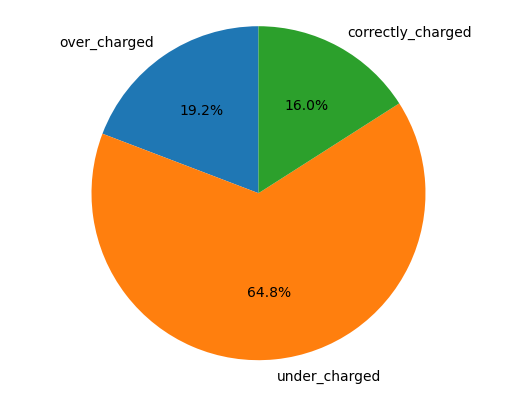

In [1021]:
import matplotlib.pyplot as plt

labels = ['over_charged', 'under_charged', 'correctly_charged']
values = [len(over_charged), len(under_charged), len(correctly_charged)]

plt.pie(values, labels = labels, autopct='%1.1f%%', startangle=90)

plt.axis('equal')

plt.show()

